# Importing Libraries

In [1]:
#importing the basic libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import missingno as mano

from numpy.random import seed
from numpy.random import randn
from numpy import mean
from numpy import std

from statsmodels.graphics.gofplots import qqplot
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import anderson

import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
train = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/train_data.xlsx")

In [3]:
test = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/test_data.xlsx")

In [4]:
sample = pd.read_csv('/kaggle/input/procom23-data-science-competition-round-1/sample_submission.csv')

In [5]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   ID                           1978 non-null   int64 
 1   Number of views last 7 days  1978 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.0+ KB


In [6]:
sample.head()

,ID,Number of views last 7 days
0,7910,[Your Prediction]
1,7911,[Your Prediction]
2,7912,[Your Prediction]
3,7913,[Your Prediction]
4,7914,[Your Prediction]


## What is the shape of train and test set?

In [7]:
train.shape

(7910, 11)

In [8]:
test.shape

(1978, 10)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7910 non-null   int64  
 1   Price                        7910 non-null   object 
 2   Boat Type                    7910 non-null   object 
 3   Manufacturer                 6824 non-null   object 
 4   Type                         7904 non-null   object 
 5   Year Built                   7910 non-null   int64  
 6   Length                       7905 non-null   float64
 7   Width                        7867 non-null   float64
 8   Material                     6522 non-null   object 
 9   Location                     7888 non-null   object 
 10  Number of views last 7 days  7910 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 679.9+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1978 non-null   int64  
 1   Price         1978 non-null   object 
 2   Boat Type     1978 non-null   object 
 3   Manufacturer  1726 non-null   object 
 4   Type          1978 non-null   object 
 5   Year Built    1978 non-null   int64  
 6   Length        1974 non-null   float64
 7   Width         1965 non-null   float64
 8   Material      1617 non-null   object 
 9   Location      1964 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 154.7+ KB


## How many Columns in train set have missing values?

In [11]:
#Display Missing Values by numbers    
train.isnull().sum()

ID                                0
Price                             0
Boat Type                         0
Manufacturer                   1086
Type                              6
Year Built                        0
Length                            5
Width                            43
Material                       1388
Location                         22
Number of views last 7 days       0
dtype: int64

In [12]:
train.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145


## How many Duplicate rows are there in Train and Test sets?

In [13]:
t1 = test.iloc[:,:]
t1.drop(['ID'], axis=1, inplace = True)

In [14]:
t1.shape

(1978, 9)

In [15]:
t1 = t1.drop_duplicates()
print(t1.shape)

(1975, 9)


## What is the mean Price of boats? (In USD)

In [16]:
def currency(x):
  c = x[:3]
  return c

In [17]:
def value(x):
  c = x[4:]
  return float(c)

In [18]:
train['currency'] = train['Price'].apply(lambda x: currency(x))

In [19]:
train['value'] = train['Price'].apply(lambda x: value(x))

In [20]:
train['currency'].value_counts()

EUR    6749
CHF     790
Â£      230
DKK     141
Name: currency, dtype: int64

In [21]:
train['value'].describe()

count    7.910000e+03
mean     3.018719e+05
std      9.928971e+05
min      0.000000e+00
25%      4.150000e+04
50%      9.000000e+04
75%      2.400000e+05
max      3.100000e+07
Name: value, dtype: float64

In [22]:
train.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,EUR,279000.0
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,EUR,65000.0
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,CHF,204000.0
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27,EUR,399000.0
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,EUR,235000.0


In [23]:
def conv(x):
  if x == 'EUR':
    return 1.08
  if x == 'CHF':
    return 1.09
  if x == 'DKK':
    return 0.14
  else:
    return 1.21

In [24]:
train['final'] = train['currency'].apply(lambda x: conv(x))

In [25]:
train.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value,final
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,EUR,279000.0,1.08
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,EUR,65000.0,1.08
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,CHF,204000.0,1.09
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27,EUR,399000.0,1.08
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,EUR,235000.0,1.08


In [26]:
train['final value'] = train['final']*train['value']

In [27]:
train.mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


ID                               3954.500000
Year Built                       1894.840202
Length                             11.580548
Width                               3.521548
Number of views last 7 days       150.048546
value                          301871.859292
final                               1.068023
final value                    304095.831003
dtype: float64

## How many unique types of boat fuels does the dataset has?

In [28]:
(train['Type'].value_counts())

Used boat,Diesel                3315
Used boat,Unleaded              1350
Used boat                       1186
new boat from stock,Unleaded     880
new boat from stock              511
new boat from stock,Diesel       224
new boat on order,Unleaded       131
Display Model,Unleaded            62
new boat on order,Diesel          51
new boat on order                 48
Diesel                            45
Used boat,Electric                19
Unleaded                          19
Display Model,Diesel              16
new boat from stock,Electric      16
Display Model                     12
Used boat,Gas                      8
Display Model,Electric             6
new boat from stock,Gas            1
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Electric                           1
Used boat,Propane                  1
Name: Type, dtype: int64

## How many Diesel boats are there in train set?

In [29]:
3315+224+51+16+45

3651

## How many Display Model boats are there in the train set?

In [30]:
62+16+12+6

96

## How many unique Boat Types are there in the train set?

In [31]:
(train['Boat Type'].value_counts())

Motor Yacht                      2197
Sport Boat                       1131
Flybridge                         934
Trawler                           547
Pilothouse                        500
                                 ... 
Cabin Boat,Classic,Trawler          1
Bowrider,Classic                    1
Cabin Boat,Pilothouse               1
Bowrider,Deck Boat,Water ski        1
Cabin Boat,Hardtop,Sport Boat       1
Name: Boat Type, Length: 114, dtype: int64

## How many Classic Boats are there in the train set?

In [32]:
types = (train['Boat Type']).tolist()

In [33]:
classic = train.loc[train['Boat Type'].str.lower().str.contains('classic')]
len(classic)

185

## Which Manufacturer has the maximum mean  Number of views last 7 days?

In [34]:
m1 = train.groupby(['Manufacturer']).agg({'Number of views last 7 days':'mean', 'ID' : 'count'}).reset_index()
m1.sort_values(by= 'Number of views last 7 days', ascending= False)

,Manufacturer,Number of views last 7 days,ID
89,Baha power boats,1831.0,1
612,Rodriguez Group (Italyachts) power boats,986.0,1
794,Werner power boats,900.0,1
124,Bluewater Yachts power boats,888.0,1
11,ATOMIX power boats,885.0,1
...,...,...,...
767,Ventus power boats,34.0,1
568,Premiere Yacht power boats,34.0,1
298,Gavazzi Luciano power boats,31.0,1
173,Center Craft power boats,27.0,1


## Which 2 features are highly co-related?

<AxesSubplot:>

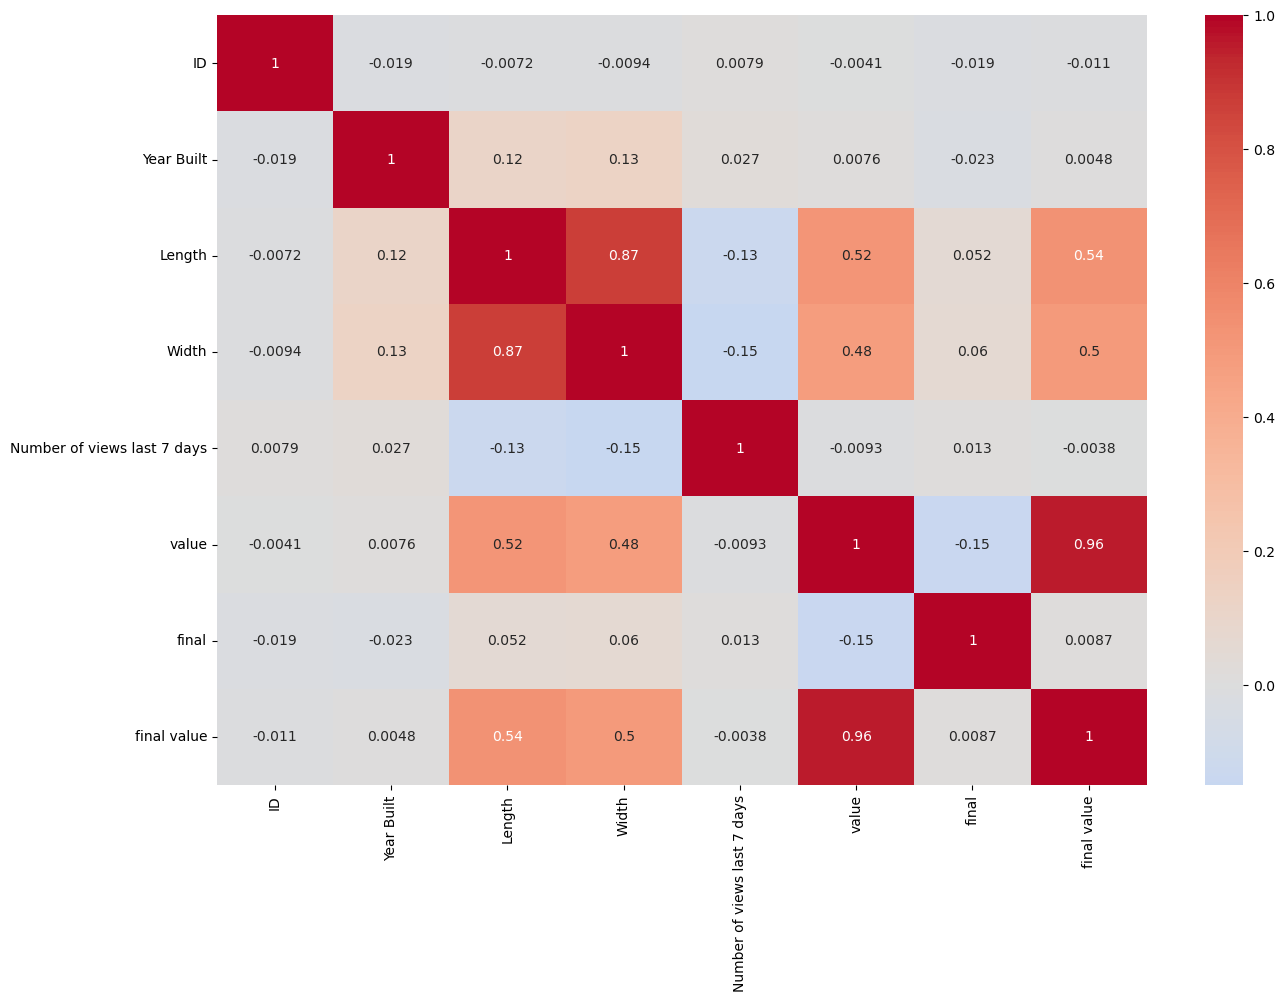

In [35]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(train.corr(), annot=True, cmap='coolwarm', center = 0)

## Which feature has the highest positive skewness? (excluding target feature)

<AxesSubplot:>

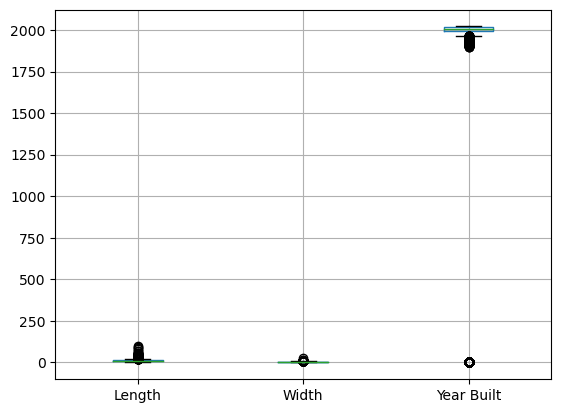

In [36]:
train.boxplot(column=['Length','Width','Year Built'], return_type='axes')

<AxesSubplot:xlabel='Length', ylabel='Count'>

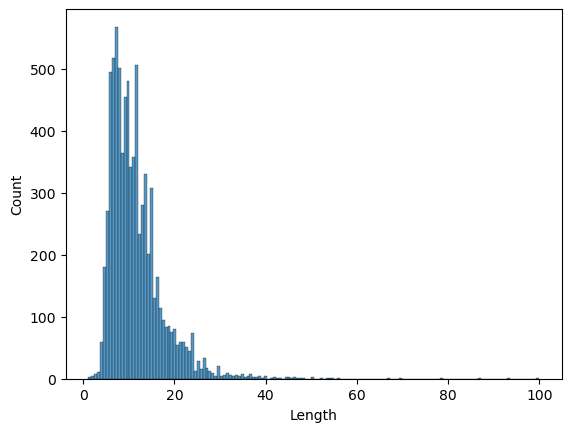

In [37]:
sns.histplot(data=train,x='Length')

<AxesSubplot:xlabel='Width', ylabel='Count'>

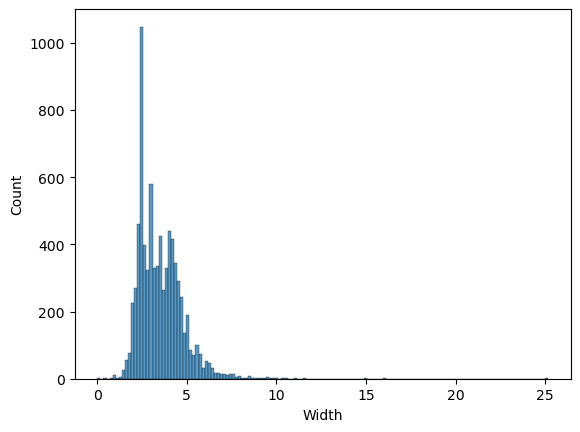

In [38]:
sns.histplot(data=train,x='Width')

<AxesSubplot:xlabel='Year Built', ylabel='Count'>

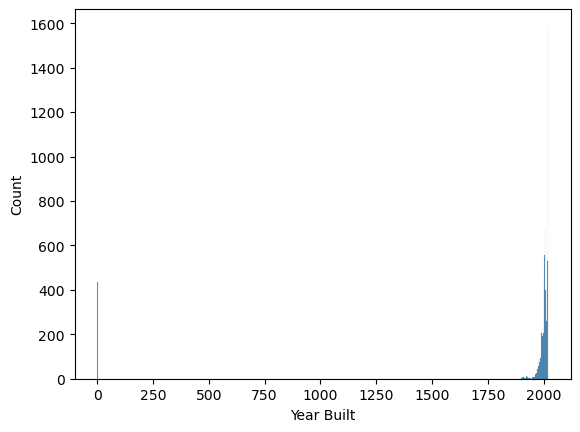

In [39]:
sns.histplot(data=train,x='Year Built')

In [40]:
len(train['Location'].unique())

2616

In [41]:
train.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value,final,final value
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,EUR,279000.0,1.08,301320.0
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,EUR,65000.0,1.08,70200.0
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,CHF,204000.0,1.09,222360.0
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27,EUR,399000.0,1.08,430920.0
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,EUR,235000.0,1.08,253800.0


In [42]:
train['Price'].describe()

count          7910
unique         2747
top       EUR 65000
freq             63
Name: Price, dtype: object

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7910 entries, 0 to 7909
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           7910 non-null   int64  
 1   Price                        7910 non-null   object 
 2   Boat Type                    7910 non-null   object 
 3   Manufacturer                 6824 non-null   object 
 4   Type                         7904 non-null   object 
 5   Year Built                   7910 non-null   int64  
 6   Length                       7905 non-null   float64
 7   Width                        7867 non-null   float64
 8   Material                     6522 non-null   object 
 9   Location                     7888 non-null   object 
 10  Number of views last 7 days  7910 non-null   int64  
 11  currency                     7910 non-null   object 
 12  value                        7910 non-null   float64
 13  final             

In [44]:
def country(x):
  return x.split()[0]

In [45]:
f = "jdjd jdjddj"
country(f)

'jdjd'

In [46]:
t = train.dropna(subset=['Location'])

In [47]:
t['country'] = t['Location'].apply(lambda x: country(x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
t.head()

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days,currency,value,final,final value,country
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26,EUR,279000.0,1.08,301320.0,Croatia
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49,EUR,65000.0,1.08,70200.0,Italy
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187,CHF,204000.0,1.09,222360.0,Switzerland
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27,EUR,399000.0,1.08,430920.0,Croatia
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145,EUR,235000.0,1.08,253800.0,Italy


## Which country has the minimum mean Number of views last 7 days?

In [49]:
t['country'].value_counts()

Germany        1556
Italy          1439
France          987
Switzerland     887
Netherlands     845
               ... 
Opwijk            1
lago              1
Steinwiesen       1
TravemÃ¼nde       1
Wijdenes          1
Name: country, Length: 105, dtype: int64

In [50]:
c7d = t.groupby(['country']).agg({'Number of views last 7 days':'mean', 'ID' : 'count'}).reset_index()
c7d.sort_values(by= 'Number of views last 7 days', ascending= True)

,country,Number of views last 7 days,ID
34,Ireland,46.0,1
40,Jersey,46.0,1
47,Lebanon,47.0,1
28,Gibraltar,52.0,1
95,Venezuela,64.0,1
...,...,...,...
5,Avenches,917.0,1
91,TravemÃ¼nde,1014.0,1
99,"ZÃ¼richse,",1017.0,1
89,Thun,1831.0,1


## What is the mean Number of views last 7 days of Water Ski Boats in Germany?

In [51]:
germany = t[t['country']=='Germany']


In [52]:
g7d = germany.loc[germany['Boat Type'].str.lower().str.contains('water ski')]

In [53]:
g7d['Number of views last 7 days'].mean()

217.0

# EDA

## Missing Value Analysis

In [54]:
train = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/train_data.xlsx")

<AxesSubplot:>

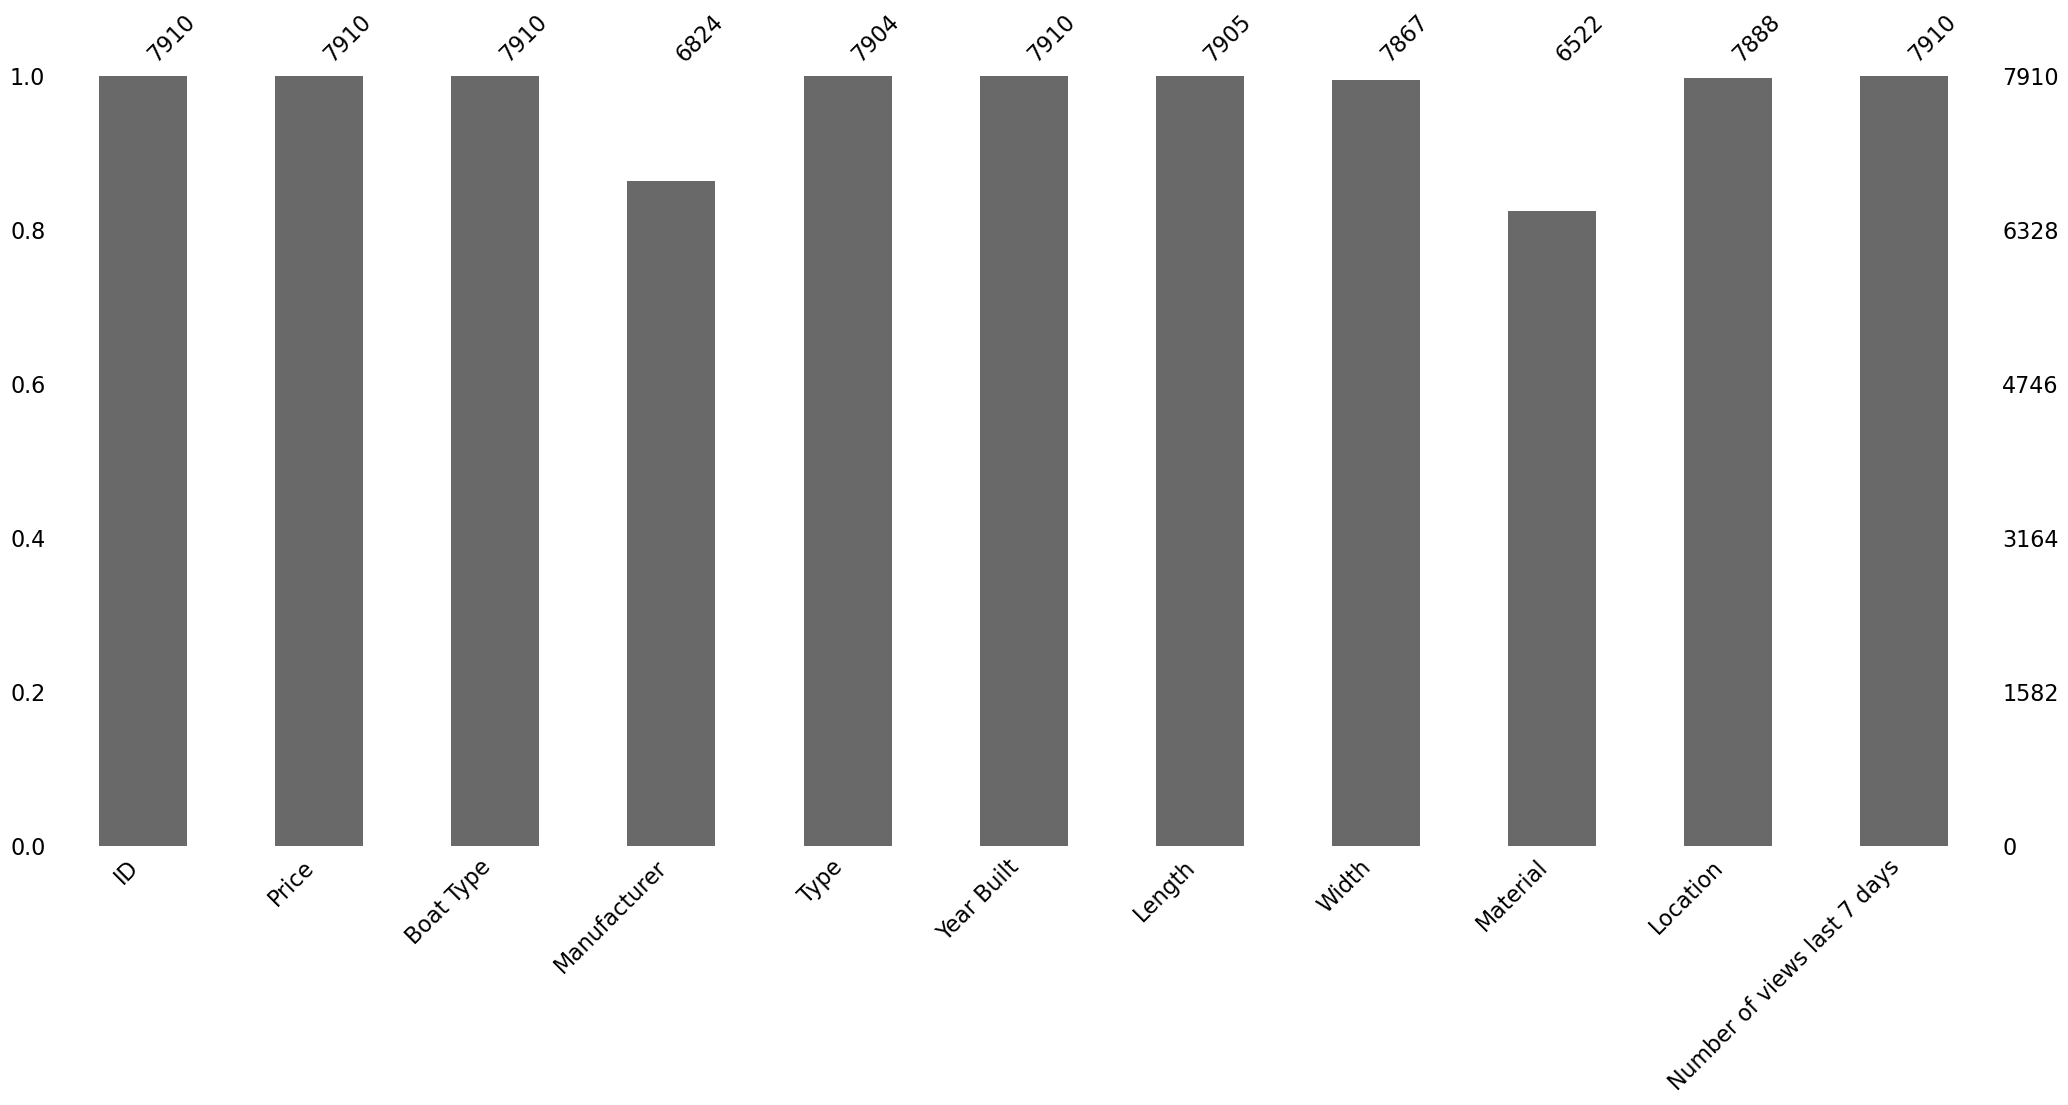

In [55]:
mano.bar(train)

<AxesSubplot:>

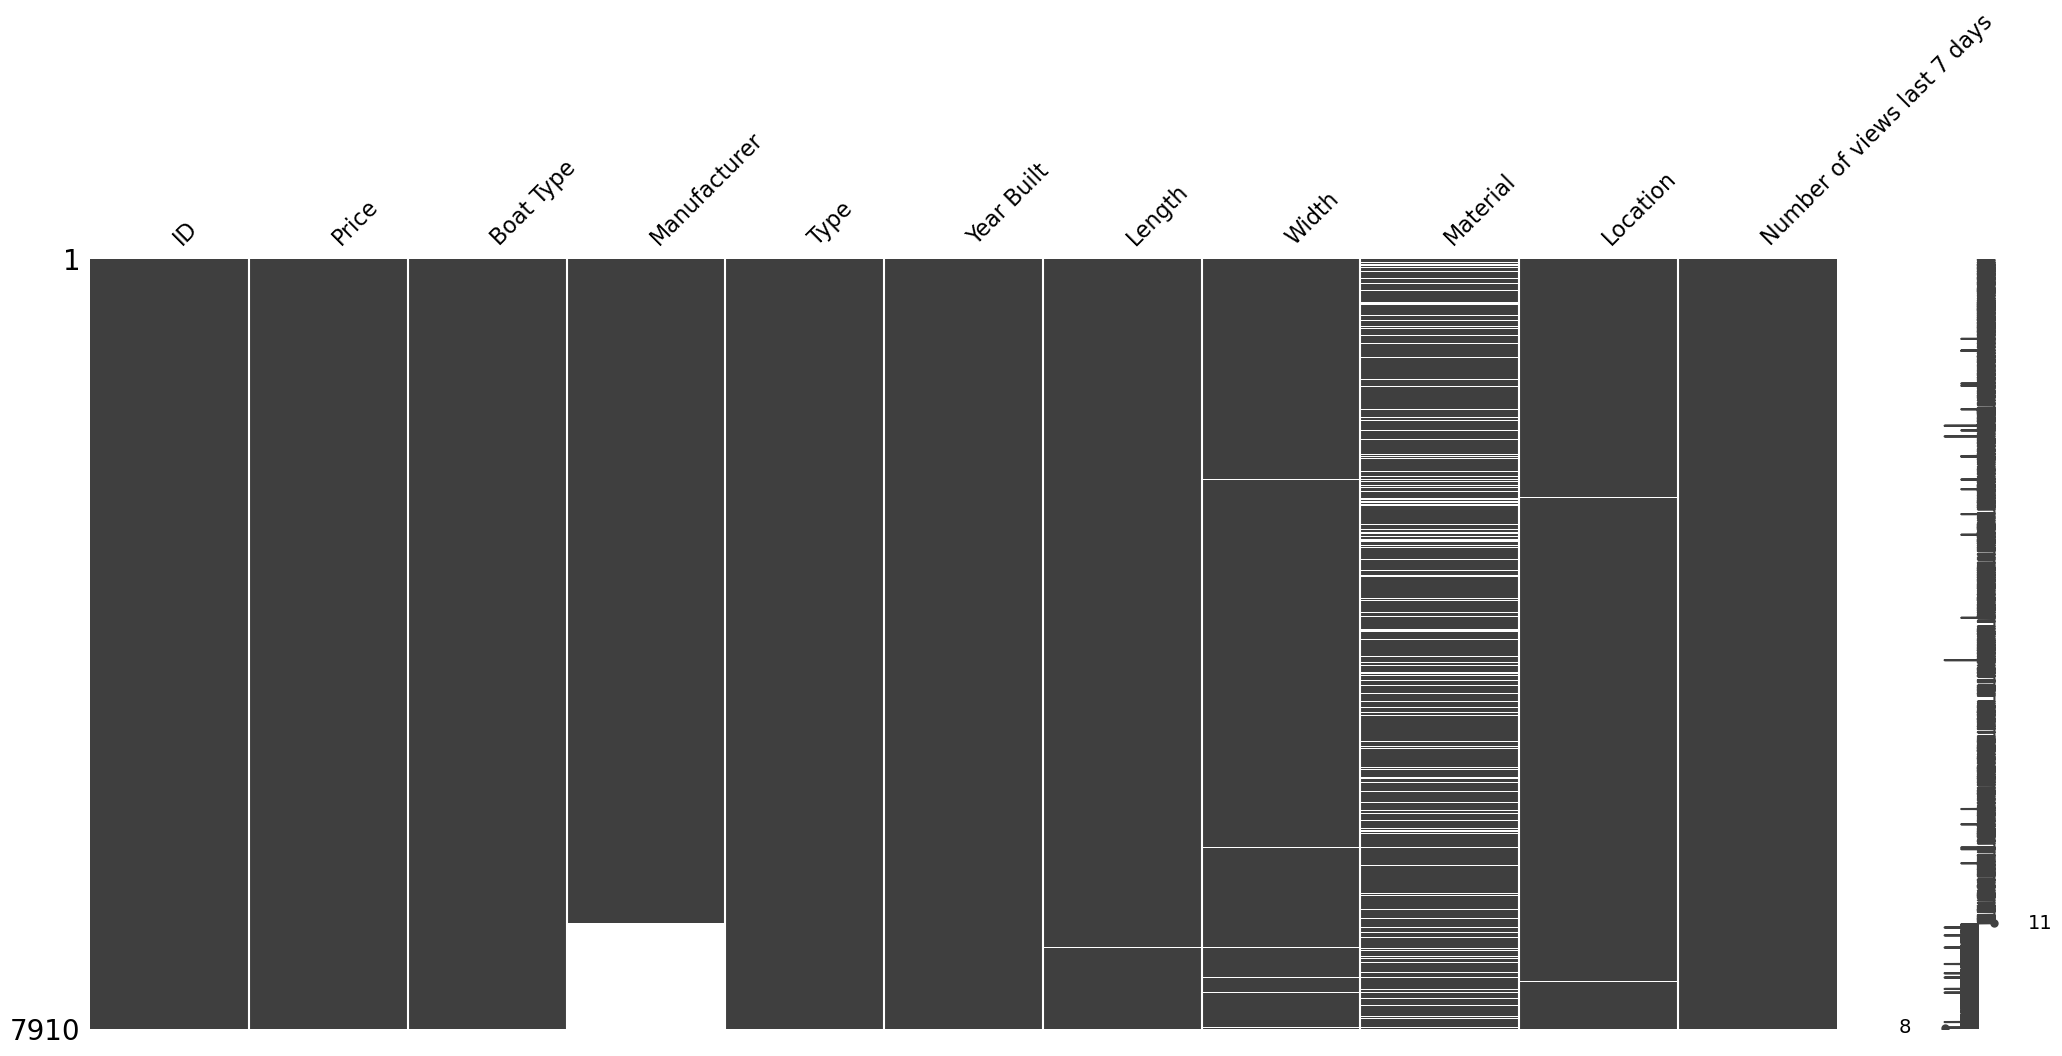

In [56]:
mano.matrix(train.sort_values(by='Manufacturer'))

<AxesSubplot:>

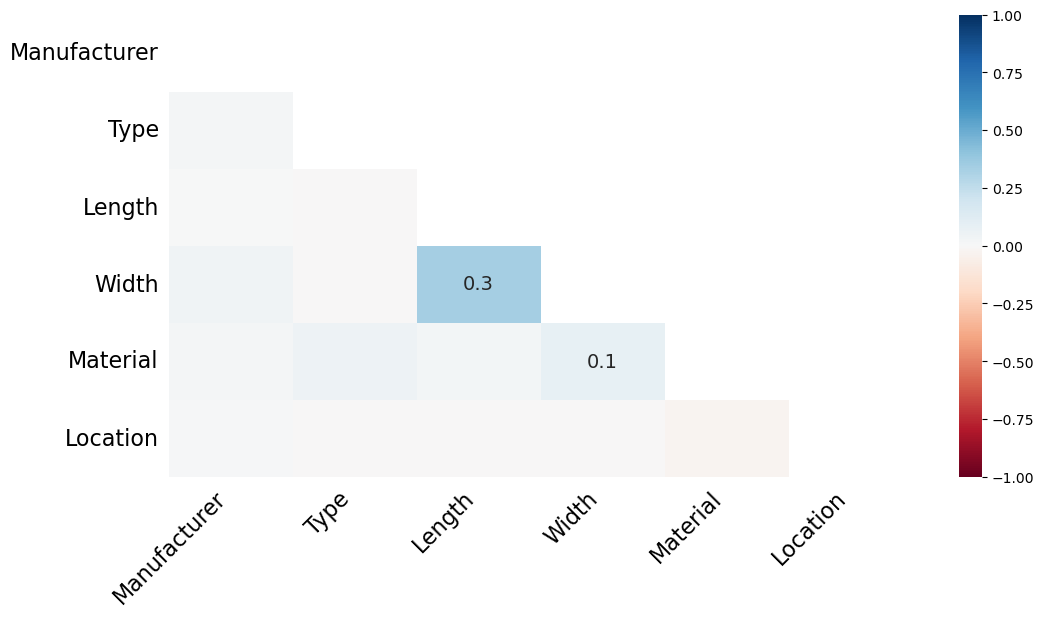

In [57]:
#plot the heatmap to determine the relationship (correlation) between missingness of columns
mano.heatmap(train, figsize=(12,6))

Summary:

We analyzed missing values, we tried to find which type of missing values are there MCAR, MAR or MNAR.

As there is no pattern and almost neglegiable correlation of missing values in column hence we have Missing completely at random

## Univariate Analysis

In [58]:
train = train.dropna()

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5619 entries, 0 to 7909
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5619 non-null   int64  
 1   Price                        5619 non-null   object 
 2   Boat Type                    5619 non-null   object 
 3   Manufacturer                 5619 non-null   object 
 4   Type                         5619 non-null   object 
 5   Year Built                   5619 non-null   int64  
 6   Length                       5619 non-null   float64
 7   Width                        5619 non-null   float64
 8   Material                     5619 non-null   object 
 9   Location                     5619 non-null   object 
 10  Number of views last 7 days  5619 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 526.8+ KB


### Year built Visulization 

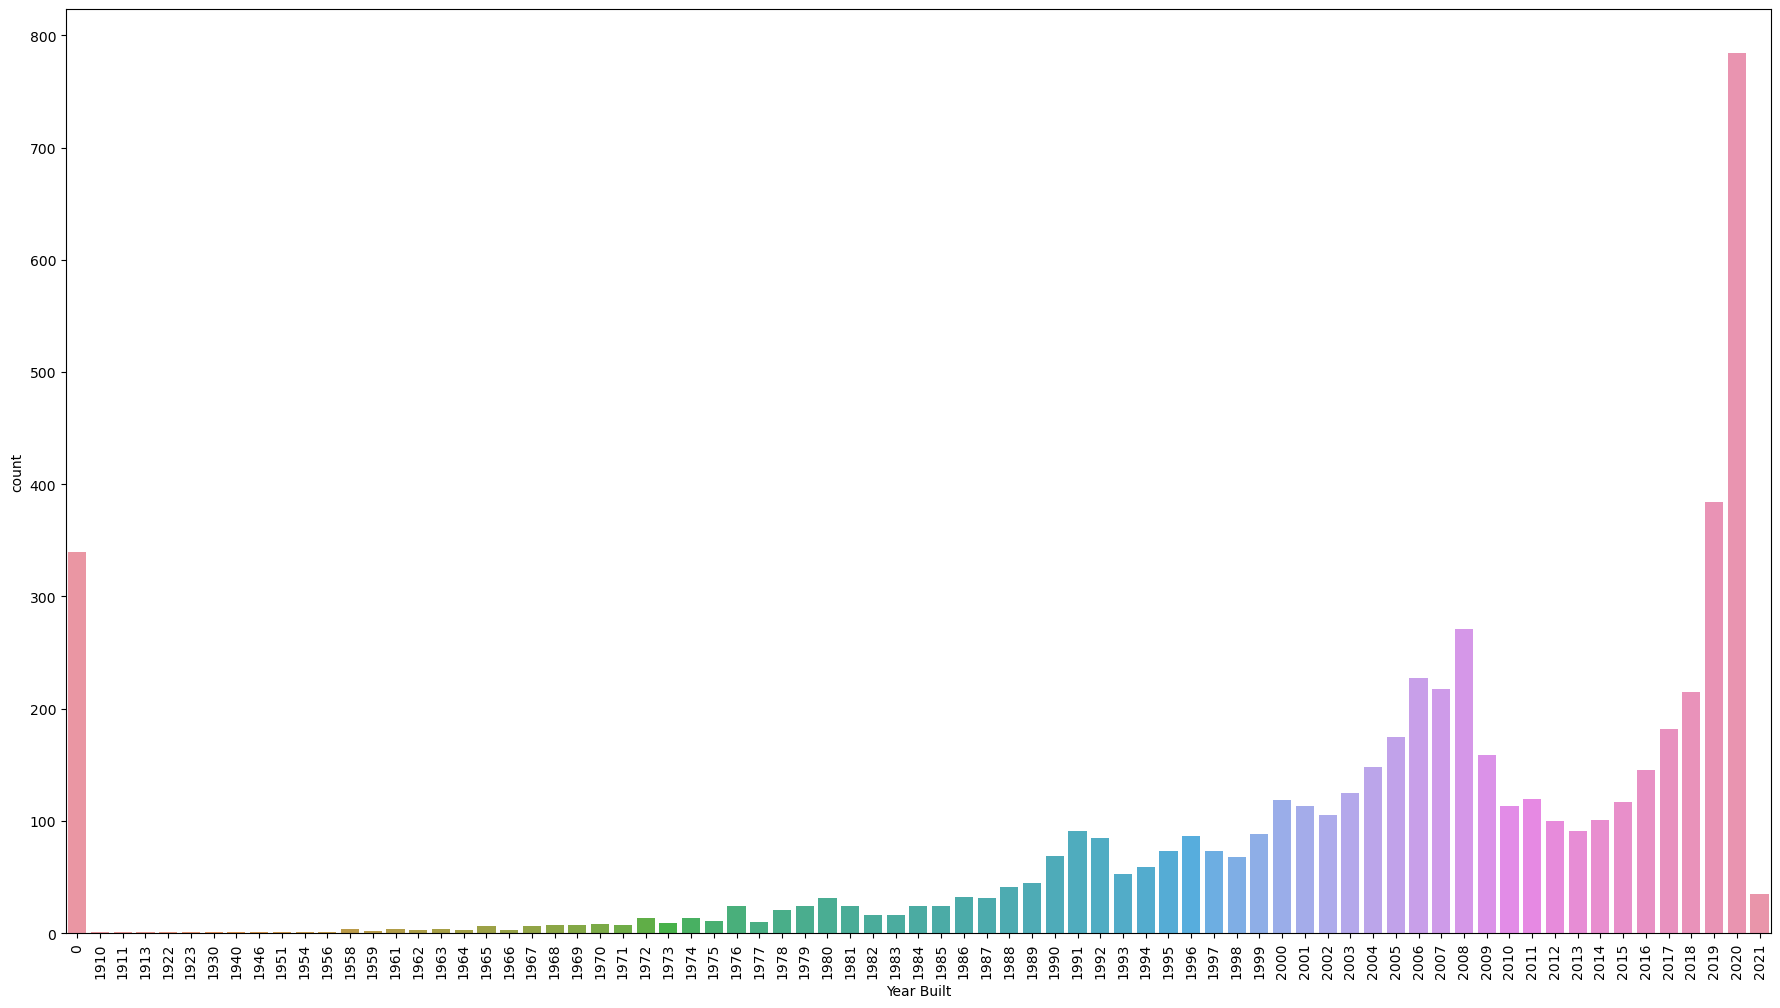

In [60]:
plt.figure(figsize=(22,12))
sns.countplot(data=train,x='Year Built')
plt.xticks(rotation=90)
plt.show()

### Listings by country

/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 159 (\x9f) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


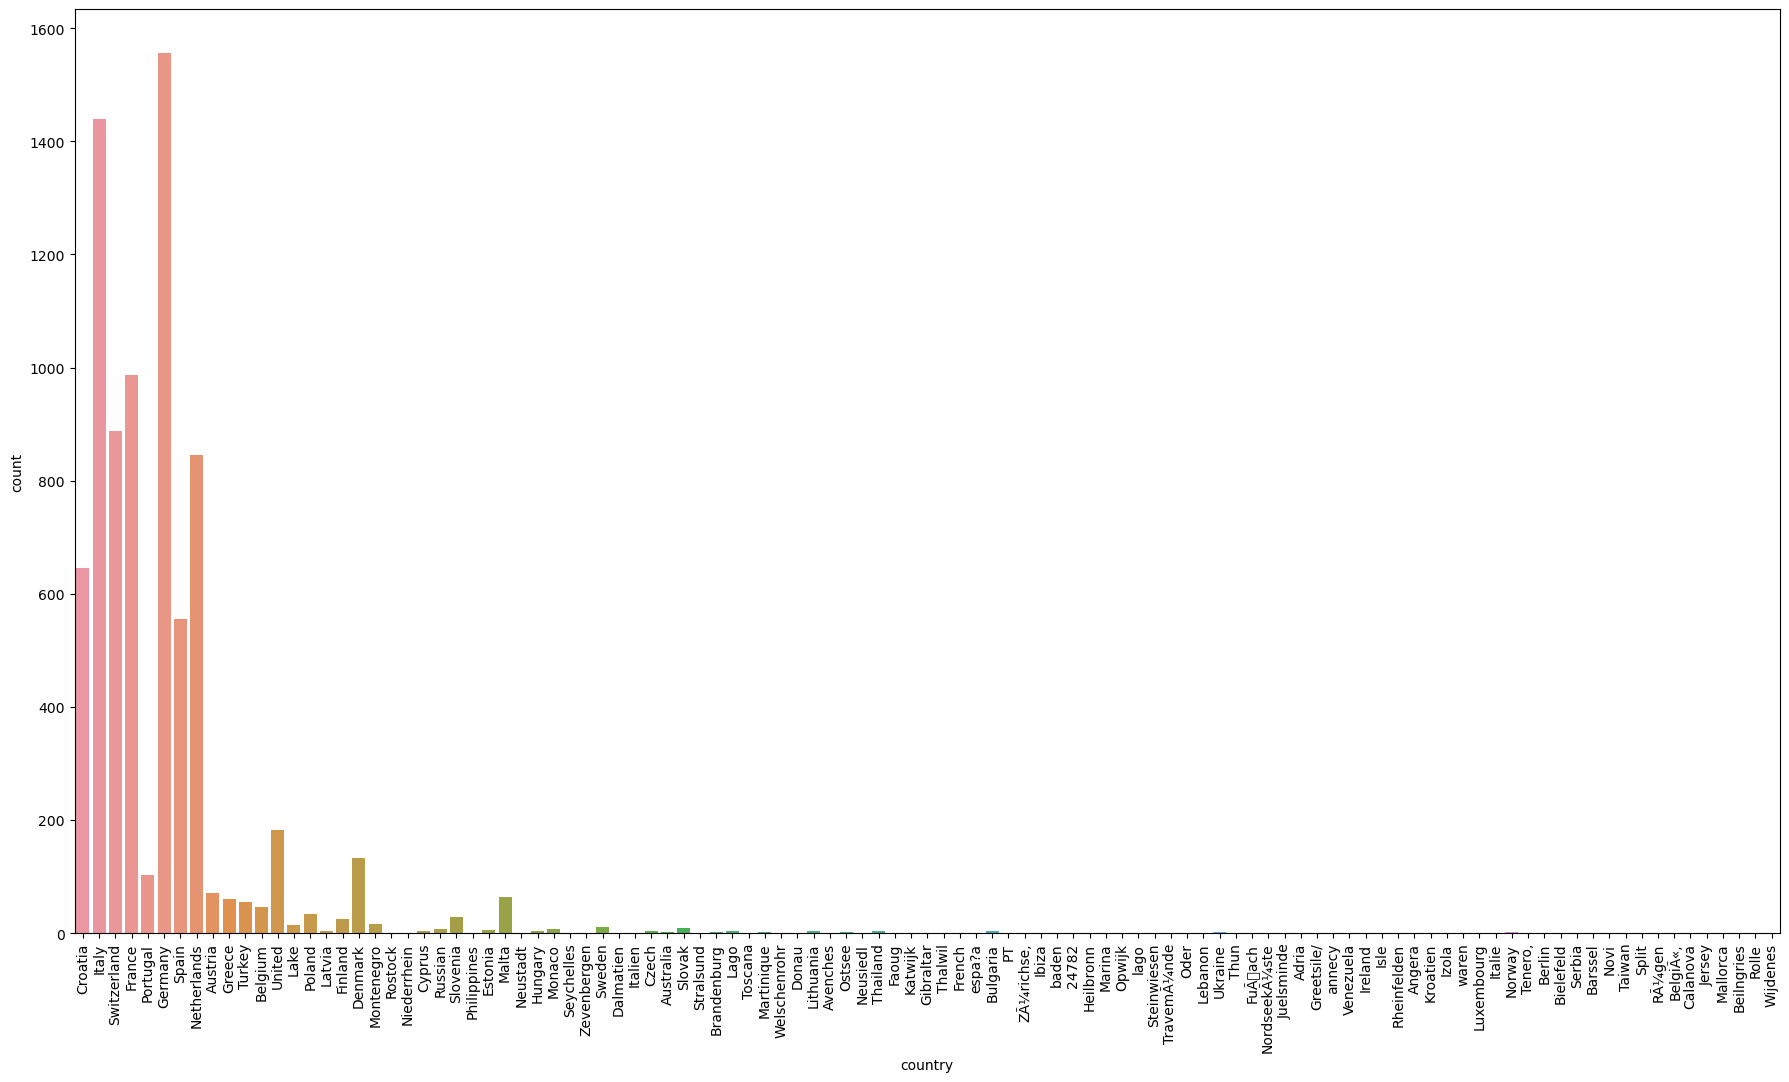

In [61]:
plt.figure(figsize=(22,12))
sns.countplot(data=t,x='country')
plt.xticks(rotation=90)
plt.show()

### Country analysis by views

In [62]:
v_c  = t.groupby('country')[['Number of views last 7 days']].sum()

In [63]:
v_c.head()

,Number of views last 7 days
country,
24782,413
Adria,75
Angera,455
Australia,150
Austria,13063


# Feature Engineering and Data Handling

In [64]:
train = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/train_data.xlsx")
test = pd.read_excel("/kaggle/input/procom23-data-science-competition-round-1/test_data.xlsx")


In [65]:
df = train.append(test).reset_index(drop = True)

In [66]:
df

,ID,Price,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Location,Number of views last 7 days
0,0,EUR 279000,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,Croatia (Hrvatska) Â» Split,26.0
1,1,EUR 65000,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,Italy Â» Toscana Â» Toscana,49.0
2,2,CHF 204000,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,Switzerland Â» Luganersee Â» Bioggio,187.0
3,3,EUR 399000,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,Croatia (Hrvatska),27.0
4,4,EUR 235000,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,Italy Â» Liguria Â» Liguria,145.0
...,...,...,...,...,...,...,...,...,...,...,...
9883,9883,CHF 13000,Sport Boat,Martin power boats,"Used boat,Diesel",0,5.70,1.90,Wood,Switzerland Â» Lake Constance Â» Altnau,NaN
9884,9884,EUR 417204,Motor Yacht,BÃ©nÃ©teau power boats,"new boat from stock,Diesel",0,14.78,4.20,GRP,Switzerland Â» VierwaldstÃ¤ttersee Â» Stansstad,NaN
9885,9885,EUR 14200,Sport Boat,Romar power boats,new boat from stock,2019,5.68,1.99,GRP,Switzerland Â» Diessenhoen,NaN
9886,9886,EUR 259000,Cabin Boat,Grandezza power boats,"Used boat,Diesel",0,10.03,3.23,GRP,"Germany Â» KÃ¶ln, Marine Olbermann",NaN


In [67]:
#Display Missing Values by numbers    
df.isnull().sum()

ID                                0
Price                             0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Location                         36
Number of views last 7 days    1978
dtype: int64

## Handling country

In [68]:
#df = df.dropna(subset=['Location'])
l_m = str(df.Location.mode())
df.Location = df.Location.fillna(l_m)

df.Length = df.Length.fillna(df.Length.mean())
df.Width = df.Width.fillna(df.Width.mean())

In [69]:
def country(x):
  return x.split()[0]

In [70]:
df['country'] = df['Location'].apply(lambda x: country(x))

## Handling price

In [71]:
def currency(x):
  c = x[:3]
  return c

In [72]:
def value(x):
  c = x[4:]
  return float(c)

In [73]:
df['currency'] = df['Price'].apply(lambda x: currency(x))

In [74]:
df['value'] = df['Price'].apply(lambda x: value(x))

In [75]:
def conv(x):
  if x == 'EUR':
    return 1.08
  if x == 'CHF':
    return 1.09
  if x == 'DKK':
    return 0.14
  else:
    return 1.21

In [76]:
df['rate'] = df['currency'].apply(lambda x: conv(x))

In [77]:
df['usd_price'] = df['rate']*df['value']

In [78]:
# Removing irrelavant and correlated columns
df = df.drop(['Price','Location','currency','value','rate'], axis=1)

In [79]:
df.head()

,ID,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,country,usd_price
0,0,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,26.0,Croatia,301320.0
1,1,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,49.0,Italy,70200.0
2,2,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,187.0,Switzerland,222360.0
3,3,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,27.0,Croatia,430920.0
4,4,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,145.0,Italy,253800.0


## Feature Engineering (New Column New/Old Boat)

In [80]:
df.Type.value_counts()

Used boat,Diesel                4140
Used boat,Unleaded              1686
Used boat                       1462
new boat from stock,Unleaded    1107
new boat from stock              665
new boat from stock,Diesel       291
new boat on order,Unleaded       150
Display Model,Unleaded            75
new boat on order                 61
new boat on order,Diesel          61
Diesel                            57
Used boat,Electric                27
Unleaded                          22
Display Model,Diesel              19
new boat from stock,Electric      18
Display Model                     18
Used boat,Gas                     10
Display Model,Electric             6
new boat from stock,Gas            2
new boat from stock,Hybrid         1
Used boat,Hybrid                   1
Electric                           1
Used boat,Propane                  1
Display Model,Gas                  1
Name: Type, dtype: int64

In [81]:
def boat_type(x):
  x = str(x)
  if 'used' in x.lower():
    return 'used'
  else:
    return 'new'

## Feature Engineering (New Column Fuel Type)

In [82]:
def fuel_type(x):
  x = str(x)
  if 'unleaded' in x.lower():
    return 'unleaded'
  elif 'electric' in x.lower():
    return 'electric'
  elif 'gas' in x.lower():
    return 'gas'
  elif 'propane' in x.lower():
    return 'propane'
  else:
    return 'diesel'

In [83]:
df['condition'] = df['Type'].apply(lambda x: boat_type(x))
# df['fuel'] = df['Type'].apply(lambda x: boat_type(x))

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9888 non-null   int64  
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     8139 non-null   object 
 8   Number of views last 7 days  7910 non-null   float64
 9   country                      9888 non-null   object 
 10  usd_price                    9888 non-null   float64
 11  condition                    9888 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [85]:
df.head()

,ID,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,country,usd_price,condition
0,0,Motor Yacht,Cayman power boats,"Used boat,Diesel",2007,17.00,4.65,GRP,26.0,Croatia,301320.0,used
1,1,Pilothouse,Motomar power boats,"Used boat,Diesel",2008,9.30,3.20,GRP,49.0,Italy,70200.0,used
2,2,Fishing Boat,Ocean Master (US) power boats,"Display Model,Diesel",2002,9.80,3.00,GRP,187.0,Switzerland,222360.0,new
3,3,Motor Yacht,NaN,"Used boat,Diesel",2006,18.87,4.90,GRP,27.0,Croatia,430920.0,used
4,4,Flybridge,Azimut power boats,"Used boat,Diesel",2006,14.65,4.36,GRP,145.0,Italy,253800.0,used


<AxesSubplot:>

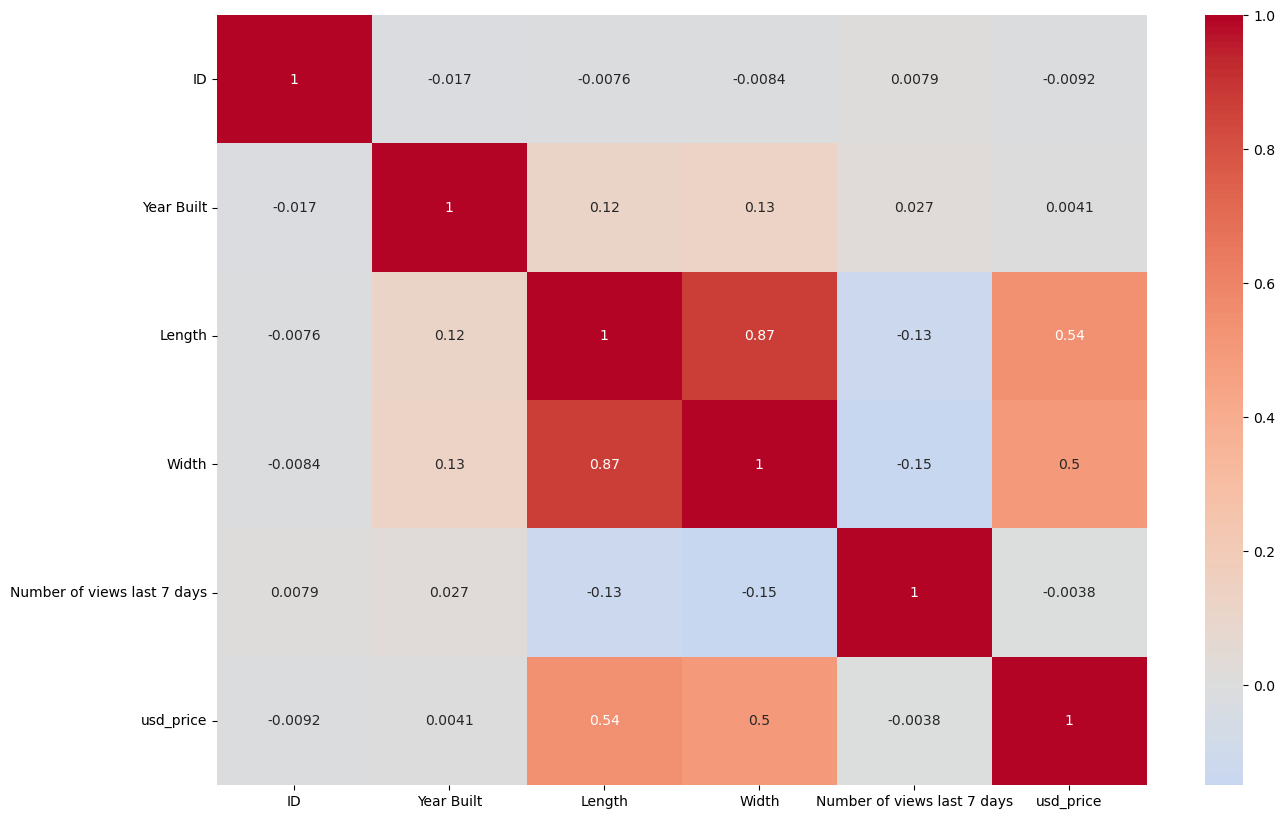

In [86]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

In [87]:
#Display Missing Values by numbers    
df.isnull().sum()

ID                                0
Boat Type                         0
Manufacturer                   1338
Type                              6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days    1978
country                           0
usd_price                         0
condition                         0
dtype: int64

In [88]:
df.Material.value_counts()

GRP                    5484
PVC                    1123
Steel                   939
Wood                    235
Aluminium               229
Plastic                  77
Carbon Fiber             30
Thermoplastic            15
Hypalon                   5
Reinforced concrete       1
Rubber                    1
Name: Material, dtype: int64

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9888 entries, 0 to 9887
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9888 non-null   int64  
 1   Boat Type                    9888 non-null   object 
 2   Manufacturer                 8550 non-null   object 
 3   Type                         9882 non-null   object 
 4   Year Built                   9888 non-null   int64  
 5   Length                       9888 non-null   float64
 6   Width                        9888 non-null   float64
 7   Material                     8139 non-null   object 
 8   Number of views last 7 days  7910 non-null   float64
 9   country                      9888 non-null   object 
 10  usd_price                    9888 non-null   float64
 11  condition                    9888 non-null   object 
dtypes: float64(4), int64(2), object(6)
memory usage: 927.1+ KB


In [90]:
df['Boat Type'].value_counts()

Motor Yacht                        2720
Sport Boat                         1407
Flybridge                          1194
Trawler                             679
Pilothouse                          613
                                   ... 
Fishing Boat,Launch,Motor Yacht       1
Bowrider,Cabin Boat,Deck Boat         1
Cabin Boat,Classic,Flybridge          1
Deck Boat,Water ski                   1
Hardtop,Motor Yacht,Sport Boat        1
Name: Boat Type, Length: 126, dtype: int64

## Feature Engineering (New Column Computing Boat Area)

In [91]:
df['Area'] = df['Length']*df['Width']

In [92]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

categ = ['Boat Type','Manufacturer','Type','Material','country','condition']
col = ['Area','usd_price']

# Encode Categorical Columns
le = LabelEncoder()
m = MinMaxScaler()

df[categ] = df[categ].apply(le.fit_transform)
df[col] = df[col].apply(le.fit_transform)

In [93]:
df.head()

,ID,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,country,usd_price,condition,Area
0,0,96,185,9,2007,17.00,4.65,2,26.0,18,2341,1,4560
1,1,109,529,9,2008,9.30,3.20,2,49.0,42,1351,1,2151
2,2,73,568,2,2002,9.80,3.00,2,187.0,93,2169,0,2131
3,3,96,910,9,2006,18.87,4.90,2,27.0,18,2522,1,4809
4,4,80,84,9,2006,14.65,4.36,2,145.0,42,2239,1,4096


<AxesSubplot:>

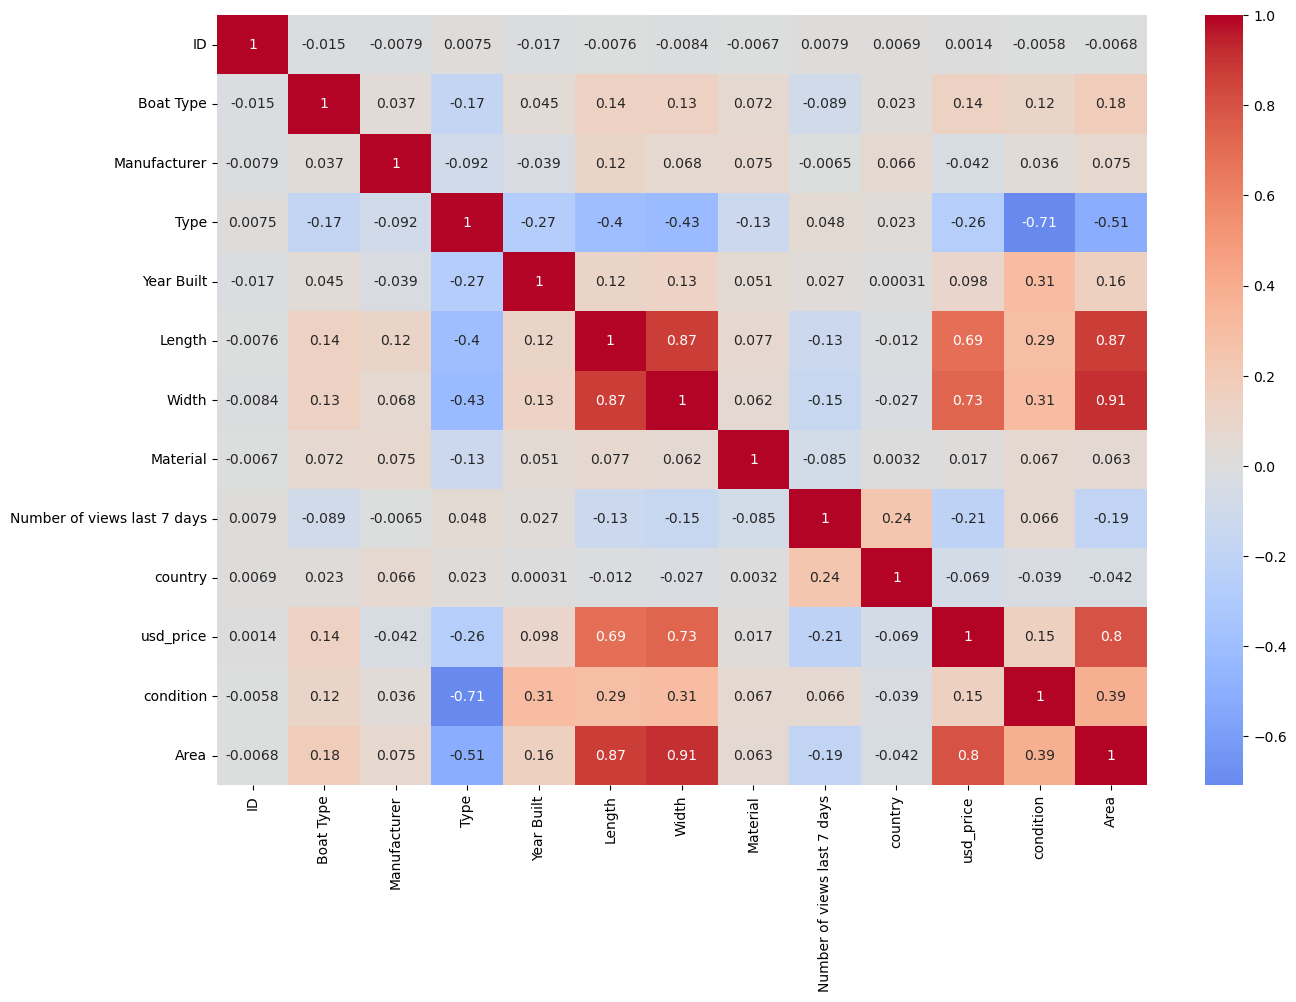

In [94]:
plt.figure(figsize=(15,10)) 
sns.color_palette(as_cmap=True)
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center = 0)

## Imputating based on mode and mean

In [95]:
df1 = df.dropna(subset = ['Number of views last 7 days'])
m_mf = str(df1.Manufacturer.mode())
df1.Manufacturer = df1.Manufacturer.fillna(m_mf)
m_mt = str(df1.Material.mode())
df1.Material = df1.Material.fillna(m_mt)
t = str(df1.Type.mode())
df1.Type = df1.Type.fillna(t)


df1.Length = df1.Length.fillna(df1.Length.mean())
df1.Width = df1.Width.fillna(df1.Width.mean())
df1['Year Built'] = df1['Year Built'].replace(0, 2020)

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == "":


In [96]:
df.head()

,ID,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,country,usd_price,condition,Area
0,0,96,185,9,2007,17.00,4.65,2,26.0,18,2341,1,4560
1,1,109,529,9,2008,9.30,3.20,2,49.0,42,1351,1,2151
2,2,73,568,2,2002,9.80,3.00,2,187.0,93,2169,0,2131
3,3,96,910,9,2006,18.87,4.90,2,27.0,18,2522,1,4809
4,4,80,84,9,2006,14.65,4.36,2,145.0,42,2239,1,4096


## Normalizing Numerical Data

In [97]:
from sklearn.preprocessing import MinMaxScaler



In [98]:
df1 = df.loc[:,:]

In [99]:
yrs = df['Year Built'].median()

In [100]:
yrs

2007.0

In [101]:
df1.isnull().sum()

ID                                0
Boat Type                         0
Manufacturer                      0
Type                              0
Year Built                        0
Length                            0
Width                             0
Material                          0
Number of views last 7 days    1978
country                           0
usd_price                         0
condition                         0
Area                              0
dtype: int64

In [102]:
df1.head()

,ID,Boat Type,Manufacturer,Type,Year Built,Length,Width,Material,Number of views last 7 days,country,usd_price,condition,Area
0,0,96,185,9,2007,17.00,4.65,2,26.0,18,2341,1,4560
1,1,109,529,9,2008,9.30,3.20,2,49.0,42,1351,1,2151
2,2,73,568,2,2002,9.80,3.00,2,187.0,93,2169,0,2131
3,3,96,910,9,2006,18.87,4.90,2,27.0,18,2522,1,4809
4,4,80,84,9,2006,14.65,4.36,2,145.0,42,2239,1,4096


In [103]:
df1 = df1.iloc[:7910,:]

## Modeling (Random Forest, Extra Trees, Gradient Boosting, CatBoost)

In [104]:
# X = df1.drop(columns = ['Number of views last 7 days','ID'])
# y = df1['Number of views last 7 days']

# dropping width
X = df1.drop(columns = ['Number of views last 7 days','ID','Width','Type','Length'])
y = df1['Number of views last 7 days']

In [105]:
X.isnull().sum()

Boat Type       0
Manufacturer    0
Year Built      0
Material        0
country         0
usd_price       0
condition       0
Area            0
dtype: int64

In [106]:
!pip install catboost

In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from catboost import CatBoostRegressor

In [108]:
# min_state = 0
# min_err = 10000
# for i in range(1,100,10):
#   rf = RandomForestRegressor(random_state=i)
#   rf.fit(X_train, y_train)
#   pred = rf.predict(X_test)
# # RMSE Computation
#   rmse = np.sqrt(MSE(y_test, pred))
#   print("RMSE : % f" %(rmse))
#   if min_err<rmse:
#     min_err = rmse
#     min_state = i

In [109]:
# 23 = 117
# 21 = 106


In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 21)

In [111]:
rf = RandomForestRegressor(random_state=13, n_estimators=1200, max_depth= 14,max_features= 5,min_samples_leaf=5,min_samples_split=12)
ex = ExtraTreesRegressor(random_state=13, n_estimators=1000, max_depth= 30,max_features= 5,min_samples_leaf=5,min_samples_split=120)

In [112]:
# cat = CatBoostRegressor(random_state=13, iterations=1000, learning_rate=0.1, depth=10, loss_function='RMSE')

In [113]:
#xgb = GradientBoostingRegressor(learning_rate=0.004 ,random_state=13, n_estimators=1200, max_depth= 30,max_features= 8,min_samples_leaf=5,min_samples_split=120)

In [114]:
X_train.isnull().sum()

Boat Type       0
Manufacturer    0
Year Built      0
Material        0
country         0
usd_price       0
condition       0
Area            0
dtype: int64

In [115]:
X_train.head()

,Boat Type,Manufacturer,Year Built,Material,country,usd_price,condition,Area
4905,84,106,2009,11,42,1692,1,3188
4000,80,317,2017,11,102,2729,1,4041
6285,80,773,2011,2,76,3014,1,5421
2259,80,625,1991,2,42,1837,1,4361
7276,0,710,2020,2,31,1268,0,878


In [116]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=14, max_features=5, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=1200, random_state=13)

In [117]:
ex.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=30, max_features=5, min_samples_leaf=5,
                    min_samples_split=120, n_estimators=1000, random_state=13)

In [118]:
#xgb.fit(X_train, y_train)

In [119]:
rf.fit(X,y)
#xgb.fit(X,y)

RandomForestRegressor(max_depth=14, max_features=5, min_samples_leaf=5,
                      min_samples_split=12, n_estimators=1200, random_state=13)

In [120]:
from sklearn.metrics import mean_squared_error as MSE

pred = rf.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  82.738059


In [121]:
# from sklearn.metrics import mean_squared_error as MSE

# pred = xgb.predict(X_test)
 
# # RMSE Computation
# rmse = np.sqrt(MSE(y_test, pred))
# print("RMSE :% f" %(rmse))

In [122]:
from sklearn.metrics import mean_squared_error as MSE

pred = ex.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE :% f" %(rmse))

RMSE : 112.349926


In [123]:
## m_d 80 105

In [124]:
ex.fit(X_train, y_train)

ExtraTreesRegressor(max_depth=30, max_features=5, min_samples_leaf=5,
                    min_samples_split=120, n_estimators=1000, random_state=13)

In [125]:
from sklearn.metrics import mean_squared_error as MSE

pred = ex.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  112.349926


In [126]:
X.shape

(7910, 8)

In [127]:
rf.score(X_test, y_test)

0.6461664172777521

In [128]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1978 entries, 0 to 1977
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            1978 non-null   int64  
 1   Price         1978 non-null   object 
 2   Boat Type     1978 non-null   object 
 3   Manufacturer  1726 non-null   object 
 4   Type          1978 non-null   object 
 5   Year Built    1978 non-null   int64  
 6   Length        1974 non-null   float64
 7   Width         1965 non-null   float64
 8   Material      1617 non-null   object 
 9   Location      1964 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 154.7+ KB


In [129]:
test.Manufacturer = test.Manufacturer.fillna(test.Manufacturer.mode())

In [130]:
s_file = df.iloc[7910:,:]
s_file = s_file.drop(columns = ['Number of views last 7 days','ID','Width','Type','Length'])
pred_f = rf.predict(s_file)
#pred_x = xgb.predict(s_file)

In [131]:
len(pred)

1582

In [132]:
sample = pd.read_csv("/kaggle/input/procom23-data-science-competition-round-1/sample_submission.csv")

In [133]:
sample.head()

,ID,Number of views last 7 days
0,7910,[Your Prediction]
1,7911,[Your Prediction]
2,7912,[Your Prediction]
3,7913,[Your Prediction]
4,7914,[Your Prediction]


In [134]:
sample['Number of views last 7 days'] = pred_f

In [135]:
sample.to_csv("s6.csv",index=False)

In [136]:
from sklearn.ensemble import GradientBoostingRegressor

In [137]:
xgb = GradientBoostingRegressor(random_state=13)

In [138]:
xgb.fit(X_train, y_train)

GradientBoostingRegressor(random_state=13)

In [139]:
xgb.score(X_test, y_test)

0.4232982660516348

In [140]:
from sklearn.metrics import mean_squared_error as MSE

pred = xgb.predict(X_test)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  105.628577
